Naveeda Ali 
<br>
Date: Feb. 28, 2024
<br>
PHYS 2030 W24

__Rubric__ (100 points total):

- Part (a) /__40 points__

- Part (b) /__10 points__

- Part (c) /__10 points__

- Part (d) /__40 points__

# <center><font color=#46769B>Exercise 7: Simple pendulum</font></center>

## <font color=#46769B>Introduction</font>

An ideal simple pendulum consists of a rigid rod of length $\ell$, with a mass at one end and a frictionless pivot at the other end, such that the pendulum is free to oscillate in the vertical plane under the influence of gravity, with gravitational acceleration $g$. The equation of motion is

$$\theta''(t) + \omega^2 \, \sin\theta(t) = 0$$

where $t$ is time, $\theta(t)$ is the angle of displacement from the vertical axis (where $\theta = 0$ corresponds to the pendulum oriented straight downward), and $\omega = \sqrt{g/\ell}$. 

For small-angle oscillations, it suffices to take the small-angle approximation, $\theta \ll 1$, which yields the equation of motion

$$\theta''(t) + \omega^2 \, \theta(t) = 0 \, .$$

In this case, the pendulum undergoes sinusoidal motion with period $T = 2\pi/\omega$.

If the amplitude of oscillation is not small, the pendulum is an *anharmonic oscillator* and in general can only be solved numerically. (Well, actually, an exact solution can be given in terms of special functions or a power series. Here is a [reference](https://arxiv.org/pdf/2108.09395.pdf), or you can [watch a video](https://www.youtube.com/watch?v=efvT2iUSjaA)).
In this case, the pendulum's motion is still periodic, but it is no longer sinusoidal. The period $T$ is no longer simply $2\pi/T$, but depends on the amplitude of the pendulum's displacement.

The goals of this exercise are:
- Solve the equation of motion for a pendulum
- Gain experience with the Euler method

Required reading:
- *Lesson 7: Euler method*


## <font color=#46769B>Part (a)</font>

Consider a pendulum with equation of motion

$$\theta''(t) + \omega^2 \sin\theta(t) = 0 \, ,$$

that starts from rest at $t=0$ with initial displacement $\theta_0$. That is, the initial condition is 

$$\theta(0) = \theta_0 , \qquad \theta'(0) = 0 \, .$$ 

Here we will consider $\theta_0 = 0.01$. Also, for simplicity, set $\omega = 2\pi$.

Perform the following tasks:
- Write a code to perform the (forward) Euler method, with a uniform step-size $h$, for solving for $\theta(t)$ as a function of $t$, up to a final time $t_f = 5$. Choose the number of steps such that your results converge with relative tolerance `rtol=1e-2` and absolute tolerance `atol=1e-3` when you double the number of steps $N$, following the method described in lecture notes. What number of steps was needed?

- Make a plot showing your converged numerical solutions for $\theta(t)$ and $\theta^\prime(t)$ vs time $t$ on the same plot (include a legend and label for your $x$-axis). 

- On the same plot, show the analytic solutions for $\theta(t)$ and $\theta^\prime(t)$ in the small-angle limit with the same initial conditions (with a dashed line). 




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#Define function f(t,y)
omega = 2 * np.pi  
def f(t, y):
    y1, y2 = y
    return [y2, -omega**2 * np.sin(y1)]

#Define boundary conditions
y0 = [0.01, 0.0]  
t0, tf = 0, 5

#Define function for Euler method 
def Euler_method(num_steps):
    t = np.linspace(t0, tf, num=num_steps+1)
    h = t[1] - t[0]
    # Initialize where results will be saved
    y = np.zeros((num_steps+1, 2))  # Array to store both position and velocity
    y[0] = y0

    # Iterate
    for i in range(num_steps):
        ti = t[i]
        yi = y[i]
        y_prime = f(ti, yi)
        y[i+1] = yi + h * np.array(y_prime)
    return t, y

#Starting number of steps
num_steps = 100
t_old, y_old = Euler_method(num_steps)
converged = False

#Find what number of steps convergence will occur
while not(converged):
    #Try double steps
    num_steps = 2 * num_steps
    print("Not converged yet. Trying", num_steps, "steps.")
    t_new, y_new = Euler_method(num_steps)
    converged = np.allclose(y_old, y_new[::2], atol=1e-2, rtol=1e-3)
    y_old = y_new
print("Converged with", num_steps, "steps.")

#Plot numerical answers
theta = y_new[:, 0]
plt.plot(t_new, theta, label="Euler Method")

#Plot analytical answers (using solve_ivp)
t = np.linspace(t0,tf,num=num_steps+1)
num_steps = 1000
sol= solve_ivp(f,[t0,tf], y0, t_eval=t)
y= sol.y[0]
plt.plot(t,y,label='Analytical Method',linestyle='dashed')

plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()



## <font color=#46769B>Part (b)</font>

In Part (a), since $\theta_0$ was small, you should have found good agreement with the analyic solution describing sinusoidal oscillation. Now, repeat the all steps of Part (a) with a different initial condition, $\theta_0 = 1$ and convergence tolerances of `rtol=atol=1e-2`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#Define function f(t,y)
omega = 2 * np.pi  
def f(t, y):
    y1, y2 = y
    return [y2, -omega**2 * np.sin(y1)]

#Define boundary conditions
y0 = [1, 0.0]  # Initial conditions: [position, velocity]
t0, tf = 0, 5

#Define Euler's method function
def Euler_method(num_steps):
    t = np.linspace(t0, tf, num=num_steps+1)
    h = t[1] - t[0]
    # Initialize where results will be saved
    y = np.zeros((num_steps+1, 2))  # Array to store both position and velocity
    y[0] = y0

    for i in range(num_steps):
        ti = t[i]
        yi = y[i]
        y_prime = f(ti, yi)
        y[i+1] = yi + h * np.array(y_prime)
    return t, y

#Starting number of steps
num_steps = 1000
t_old, y_old = Euler_method(num_steps)
converged = False

#Find number of steps that converge
while not(converged):
    # Try double steps
    num_steps = 2 * num_steps
    print("Not converged yet. Trying", num_steps, "steps.")
    t_new, y_new = Euler_method(num_steps)
    converged = np.allclose(y_old, y_new[::2], atol=1e-2, rtol=1e-2)
    y_old = y_new
print("Converged with", num_steps, "steps.")

#Plot numerical results
theta = y_new[:, 0]
plt.plot(t_new, theta, label="Euler Method")

#Plot analytical results
t = np.linspace(t0,tf,num=num_steps+1)
num_steps = 1000
sol= solve_ivp(f,[t0,tf], y0, t_eval=t)
y= sol.y[0]
plt.plot(t,y,label='Analytical Method',linestyle='dashed')

plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

## <font color=#46769B>Part (c)</font>

Repeat the all steps of Part (a) with a different initial condition, $\theta_0 = 3$ and convergence tolerances of `rtol=atol=1e-2`.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#Define function f(t,y)
omega = 2 * np.pi  
def f(t, y):
    y1, y2 = y
    return [y2, -omega**2 * np.sin(y1)]

#Define boundary conditions
y0 = [3, 0.0] 
t0, tf = 0, 5

#Define Euler's method function
def Euler_method(num_steps):
    t = np.linspace(t0, tf, num=num_steps+1)
    h = t[1] - t[0]
    # Initialize where results will be saved
    y = np.zeros((num_steps+1, 2))  # Array to store both position and velocity
    y[0] = y0

    # Iterate
    for i in range(num_steps):
        ti = t[i]
        yi = y[i]
        y_prime = f(ti, yi)
        y[i+1] = yi + h * np.array(y_prime)
    return t, y

#Starting number of steps
num_steps = 1000
t_old, y_old = Euler_method(num_steps)
converged = False

#Find what number of steps convergence occurs
while not(converged):
    num_steps = 2 * num_steps
    print("Not converged yet. Trying", num_steps, "steps.")
    t_new, y_new = Euler_method(num_steps)
    converged = np.allclose(y_old, y_new[::2], atol=1e-2, rtol=1e-2)
    y_old = y_new
print("Converged with", num_steps, "steps.")

#Plot numerical results
theta = y_new[:, 0]
plt.plot(t_new, theta, label="Euler Method")

#Plot analytical results
t = np.linspace(t0,tf,num=num_steps+1)
num_steps = 1000
sol= solve_ivp(f,[t0,tf], y0, t_eval=t)
y= sol.y[0]
plt.plot(t,y,label='Analytical Method',linestyle='dashed')

plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()


## <font color=#46769B>Part (d)</font>

In Parts (b) and (c), you should find that the small-angle solution gets worse as the initial displacement $\theta_0$ gets larger. Also, the period of oscillation $T$ gets larger with $\theta_0$, whereas for a simple harmonic oscillator, the period is independent of initial displacement.

The goal is to determine numerically $T(\theta_0)$ for the simple pendulum, that is, how the oscillation period depends on the initial displacement $\theta$.

Your tasks are as follows:

- Make a list of $\theta_0$ values with 31 values from $\theta_0 = 0.1$ to $\theta_0 = 3.1$ (linearly spaced).

- For each $\theta_0$ value, perform Euler's method with $N=10^6$ steps to determine $\theta(t)$ and $\theta'(t)$.

- Using your numerical solution, "measure" the period $T$ from your numerical results. *Hint:* you may consider determining $T$ as the distance in $t$ between maxima in $\theta(t)$, or twice the distance where $\theta(t)$ crosses zero. You need to get creative here.

- Plot the period $T$ as a function of the initial displacement $\theta_0$. 

Finally, there is an [analytical approximation](https://fy.chalmers.se/~f7xiz/TIF080/pendulum.pdf) for $T(\theta_0)$ that is valid for small and medium initial displacements $\theta_0$:

$$ T(\theta_0) = \frac{2\pi}{\omega} \left( 1 + \frac{1}{16} \theta_0^2 + \frac{11}{3072} \theta_0^4 + \mathcal{O}(\theta_0^6) \right)$$

where the leading $1$ is the small-angle result. Plot this formula on your plot to check that it agrees with your results for small and medium values of $\theta_0$.

1.0006000000000002 5003
1.0024 5012
1.0056 5028
1.01 5050
1.0158 5079
1.0228000000000002 5114
1.0314 5157
1.0414 5207
1.0530000000000002 5265
1.0662 5331
1.0812000000000002 5406
1.0982 5491
1.117 5585
1.1382 5691
1.1620000000000001 5810
1.1882000000000001 5941
1.2178 6089
1.2506000000000002 6253
1.2874 6437
1.3288 6644
1.3756000000000002 6878
1.4288 7144
1.4896 7448
1.5602 7801
1.643 8215
1.7422000000000002 8711
1.8644 9322
2.021 10105
2.2356000000000003 11178
2.5714 12857
3.3488 16744


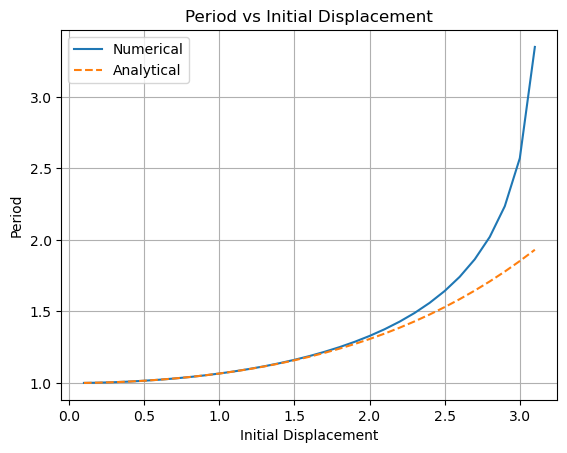

In [9]:
import numpy as np
import matplotlib.pyplot as plt

#Define function f(t, y)
omega = 2 * np.pi  # Define omega
def f(t, y):
    y1, y2 = y
    return [y2, -omega**2 * np.sin(y1)]

#Function for Euler's Method 
def Euler_method(num_steps,y0):
    t = np.linspace(t0, tf, num=num_steps+1)
    h = t[1] - t[0]
    y = np.zeros((num_steps+1, 2))
    y[0] = y0

    for i in range(num_steps):
        ti = t[i]
        yi = y[i]
        y_prime = f(ti, yi)
        y[i+1] = yi + h * np.array(y_prime)
    return t, y

#Initial theta values 
theta0_values = np.linspace(0.1, 3.1, num=31)

#Initialize list to store periods
periods_numerical = []

#Perform Euler's method for each initial displacement
for theta0 in theta0_values:
    t0, tf = 0, 5
    y0 = [theta0, 0.0] # Initial conditions: [position, velocity]
    num_steps = 10**6
    t, y = Euler_method(num_steps,y0)
    theta = y[:,0]
    
    for i in range(num_steps - 1):
        theta_i = theta[i]
        theta_i_plus = theta[i+1]

        if (theta_i > 0) and (theta_i_plus < 0):
            T = 4 * t[i]
    periods_numerical.append(T)

#Analytic solution 
T_analytical = (2 * np.pi/omega) * (1 + (1/16 * theta0_values**2) + (11/3072 * theta0_values**4))

#Plot analytic and numerical results
plt.plot(theta0_values, periods_numerical, label='Numerical')
plt.plot(theta0_values, T_analytical, label='Analytical', linestyle='--')

plt.xlabel('Initial Displacement')
plt.ylabel('Period')
plt.title('Period vs Initial Displacement')
plt.legend()
plt.grid(True)
plt.show()
